## Import libraries 

In [21]:
import warnings
warnings.filterwarnings('ignore') 
import pandas as pd
import numpy as np
np.set_printoptions(precision=4, linewidth=100) 
mba_salary_df = pd.read_csv( 'MBA Salary.csv' ) 
mba_salary_df.head( 10 )

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000
5,6,55.00,300000
6,7,70.00,260000
7,8,68.00,235000
8,9,82.80,425000
9,10,59.00,240000


## More information about the dataset

In [22]:
mba_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


## Creating Feature Set(X) and Outcome Variable(Y)

In [23]:
import statsmodels.api as sm
X = sm.add_constant( mba_salary_df['Percentage in Grade 10'] ) 
X.head(5)

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [24]:
Y = mba_salary_df['Salary'] 

## Splitting the dataset into training and validation sets

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
train_X, test_X, train_y, test_y = train_test_split( X , Y, train_size = 0.8, random_state = 100 )

## Fitting the Model

In [27]:
mba_salary_lm = sm.OLS( train_y, train_X ).fit() 

## Printing Estimated Parameters and interpreting them

In [28]:
print( mba_salary_lm.params )

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


## Model Diagnostics

In [29]:
mba_salary_lm.summary2() 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2023-03-14 11:27      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8089 176079.3802
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================

"""

## Residual Error

In [30]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline 

<Figure size 800x600 with 0 Axes>

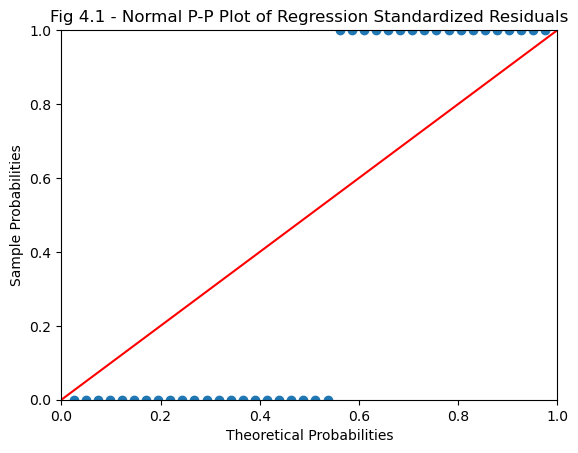

In [31]:
mba_salary_resid = mba_salary_lm.resid 
probplot = sm.ProbPlot( mba_salary_resid ) 
plt.figure( figsize = (8, 6) ) 
probplot.ppplot( line='45' ) 
plt.title( "Fig 4.1 - Normal P-P Plot of Regression Standardized Residuals" ) 
plt.show() 

## Standardize the values

In [32]:
def get_standardized_values( vals ): 
 return (vals - vals.mean())/vals.std()

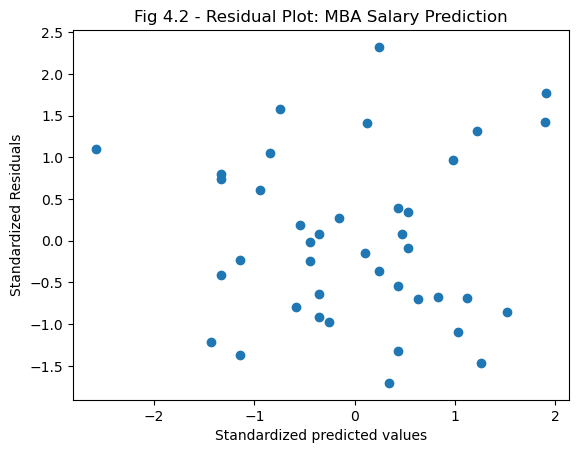

In [33]:
plt.scatter( get_standardized_values( mba_salary_lm.fittedvalues ), 
get_standardized_values( mba_salary_resid ) ) 
plt.title( "Fig 4.2 - Residual Plot: MBA Salary Prediction" ); 
plt.xlabel( "Standardized predicted values") 
plt.ylabel( "Standardized Residuals"); 

 ## Predicting on validation set

In [13]:
pred_y = mba_salary_lm.predict( test_X ) 

## Finding R-Square and RMSE

In [14]:
from sklearn.metrics import r2_score, mean_squared_error

In [15]:
np.abs(r2_score(test_y, pred_y))

0.15664584974230378

In [16]:
import numpy
np.sqrt(mean_squared_error(test_y, pred_y))

73458.04348346894